## Objective

In this phase we are trying to deploy and productionize our model. We will be using the streamlit framework to create the Restaurant Revenue Predictor application and deploying to Heroku

## Heroku

Heroku is a container based cloud Platform as a Service (PaaS) . Developers use Heroku to deploy, manage and scale modern apps. 

Now we shall create the app.py file, which is the root of our streamlit application where we define the inputs, functions and other details. 

## app.py

In [ ]:
import streamlit as st
import pandas as pd
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime

model=pickle.load(open('model_rf.pkl','rb'))

st.title('Restaurant Revenue Predictor')
st.image("""https://www.tripsavvy.com/thmb/-8bRmWGUjuqgpzPxNvJMXBEMif8=/900x0/filters:no_upscale():max_bytes(150000):strip_icc():gifv():format(webp)/new-york-city-s-11-madison-park-named-world-s-best-restaurant-665447878-5914e2965f9b586470511aaa.jpg""")
st.header('Enter the Details here :')


def predict_revenue(month,year,years_old,city_group,restaurant_type):

    x=np.zeros(42)
    x[0]=month
    x[1]=year
    x[2]=years_old
    x[3]=city_group
    x[4]=restaurant_type

    prediction=model.predict([x])[0]
    return prediction



open_year=st.date_input('Restaurant Open Date',max_value= datetime.date(2015, 1, 25),min_value=datetime.date(1996, 1, 1),
                        value=datetime.date(2005, 1, 1))

year=open_year.year
month=open_year.month
years_old=2015-year

restuarant_type=st.selectbox('Please select the Restaurant type',['Food Court','Inline','Drive-Thru','Mobile'])


if restuarant_type=='Food Court':
    restuarant_type=1
elif restuarant_type=='Inline':
    restuarant_type=2
elif restuarant_type=='Drive-Thru':
    restuarant_type=0
elif restuarant_type=='Mobile':
    restuarant_type=3


city= st.selectbox('City ',['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'])


if (city=='İstanbul' or city=='Ankara' or city=='İzmir'):
    city_group=0
else:
    city_group=1



if st.button('Predict Revenue'):
    revenue=predict_revenue(month,year,years_old,city_group,restuarant_type)
    st.success(f'The predicted revenue for the Restaurant is : {int(revenue)}  ')



## setup.sh

This is a shell file, and we need to add the following shell command inside the file.

In [ ]:
mkdir -p ~/.streamlit/

echo "\
[general]\n\
email = \"vidvath7@gmail.com\"\n\
" > ~/.streamlit/credentials.toml

echo "\
[server]\n\
headless = true\n\
enableCORS=false\n\
port = $PORT\n\
" > ~/.streamlit/config.toml

## Procfile

In [ ]:
web: sh setup.sh && streamlit run app.py

Heroku apps include a Procfile that specifies the commands that are executed by the app on startup.

The “web” means that it’s a web app. The Procfile pretty much specifies the commands once we run the app on Heroku. We specify the shell file that we created above and then call Streamlit to run app.py.

## requirements.txt

In [ ]:
numpy==1.21.5
pandas==1.4.2
scikit_learn==1.1.2
streamlit==1.12.2


The requirements.txt file lists the app dependencies together. When an app is deployed Heroku reads this file and install the appropraie python dependencies .

# Deploying on Heroku


Go to this link to access the Restaurant revenue prediction application on web.

https://restaurant-revenue-predictor.herokuapp.com/

##### Home Page

Let's see the home page of our application.

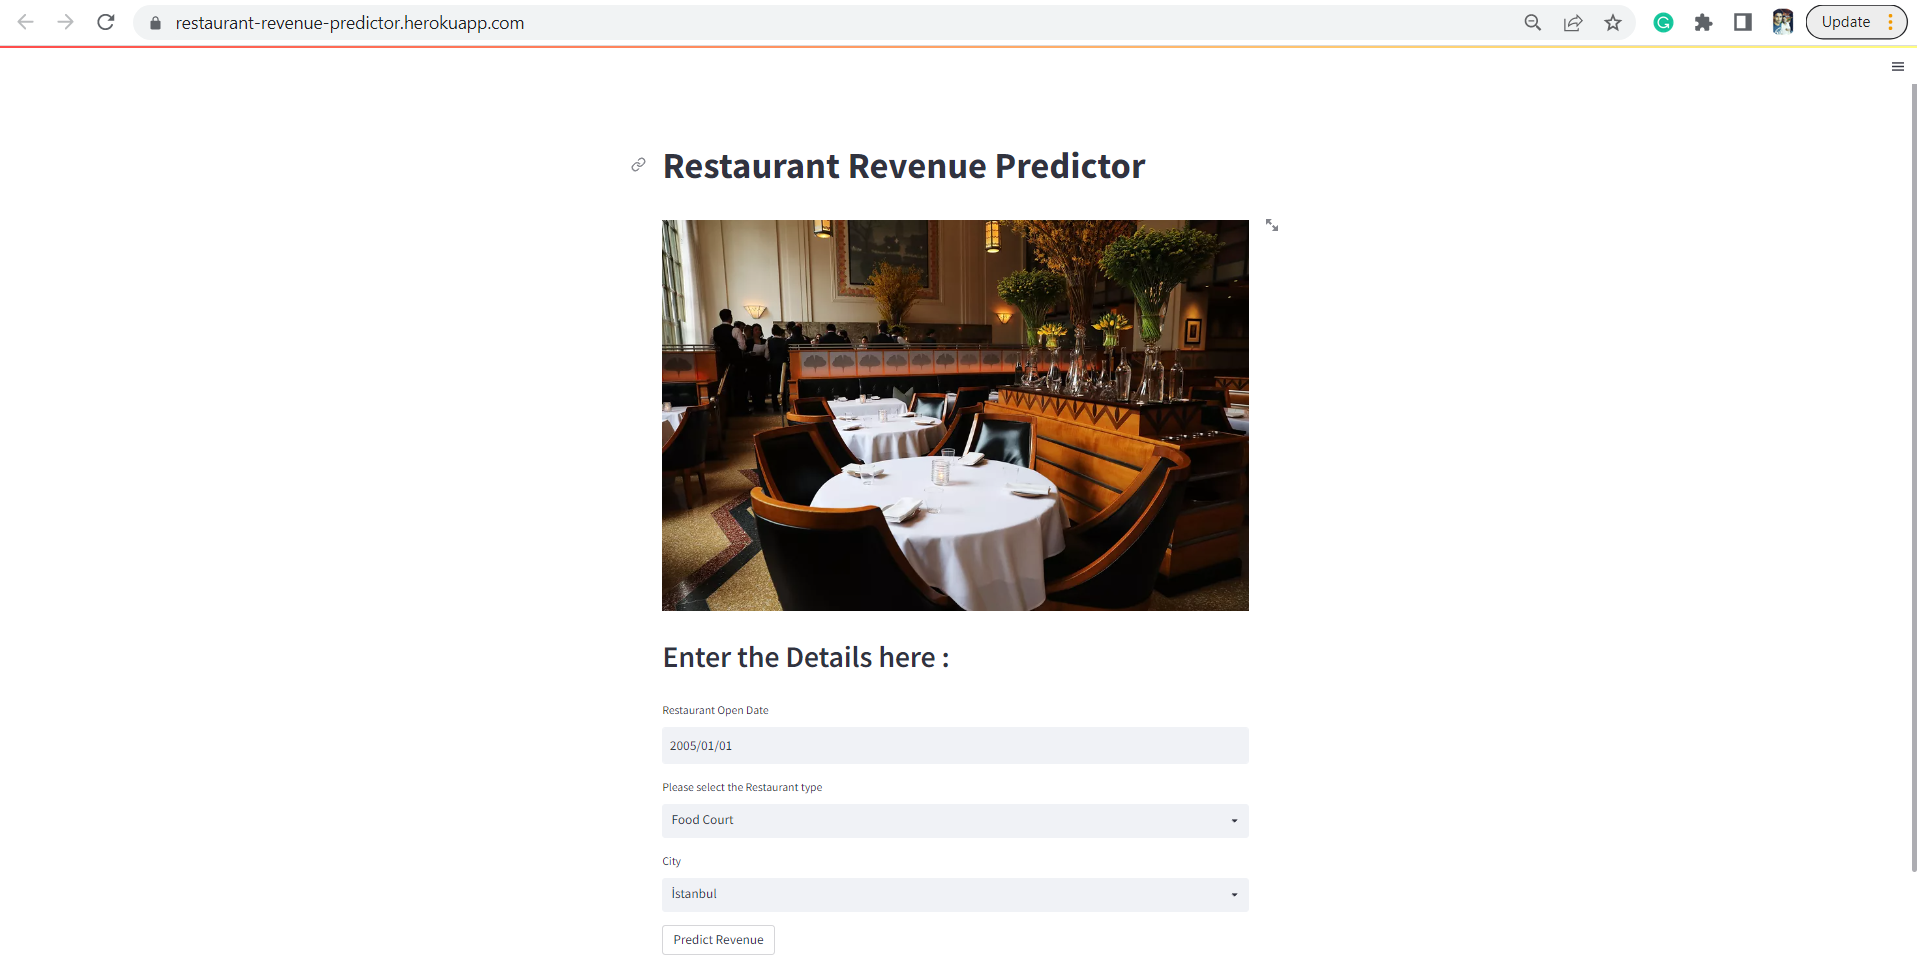

##### Providing date input

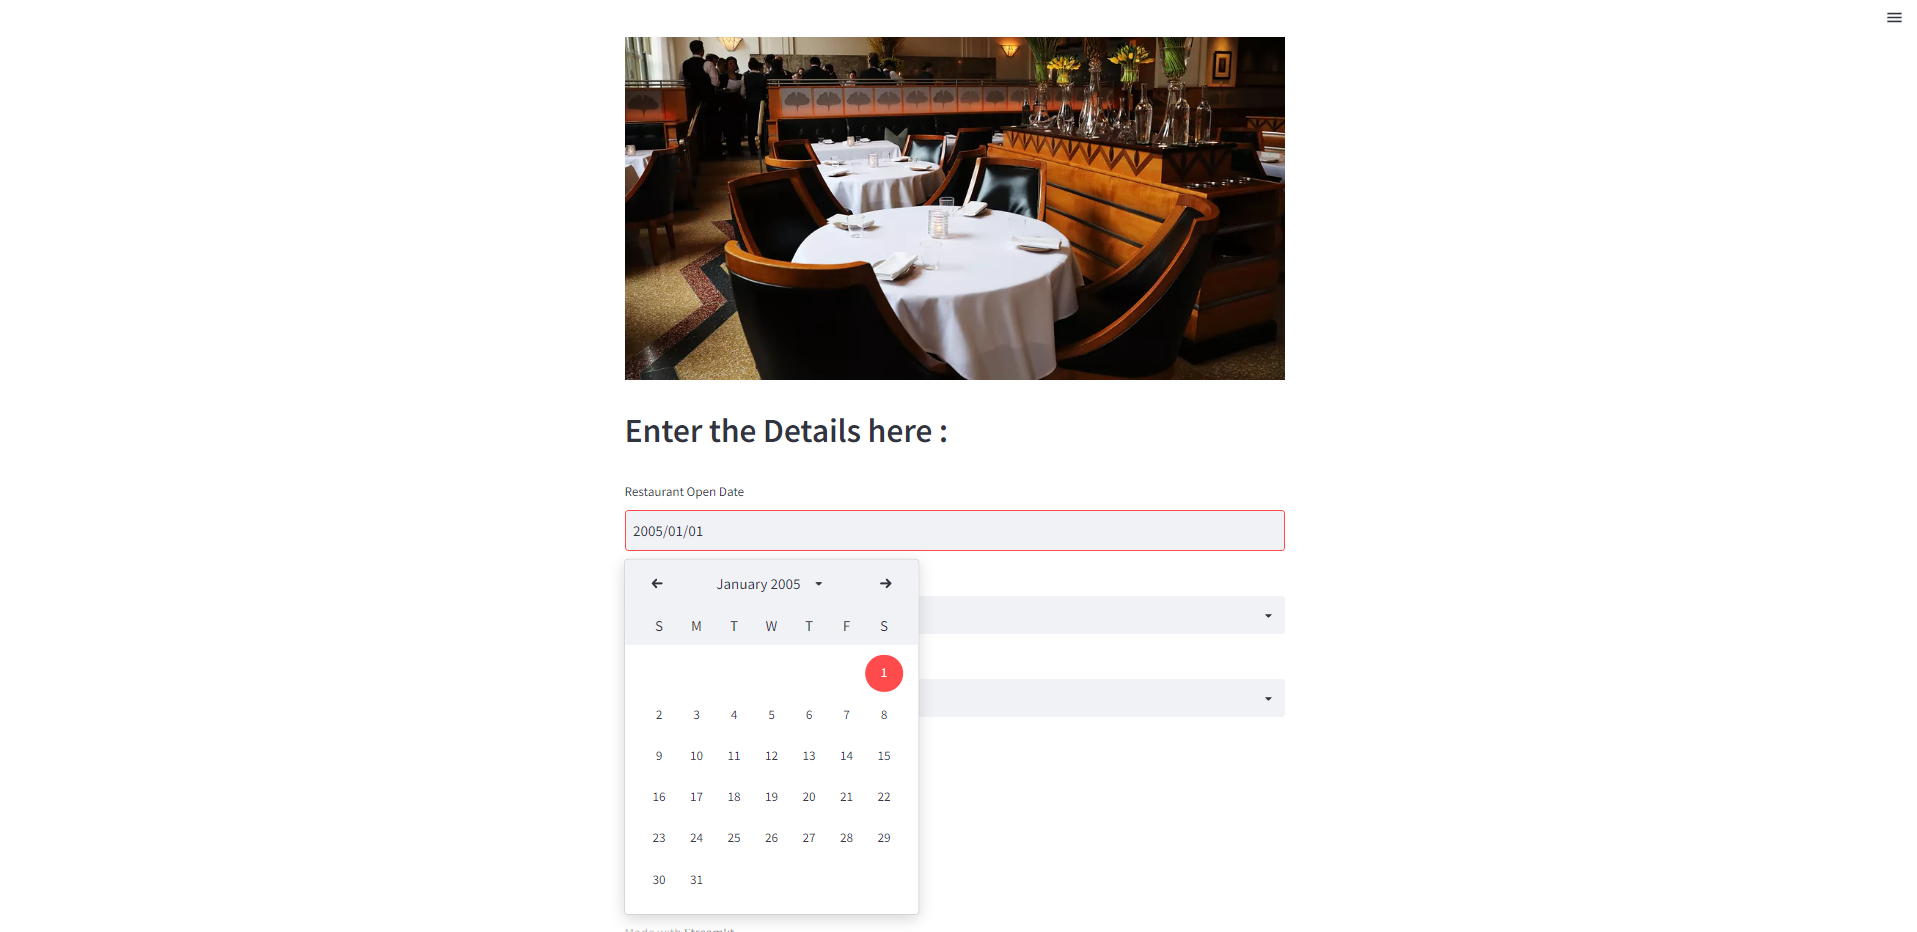

##### Providing Restaurant type details

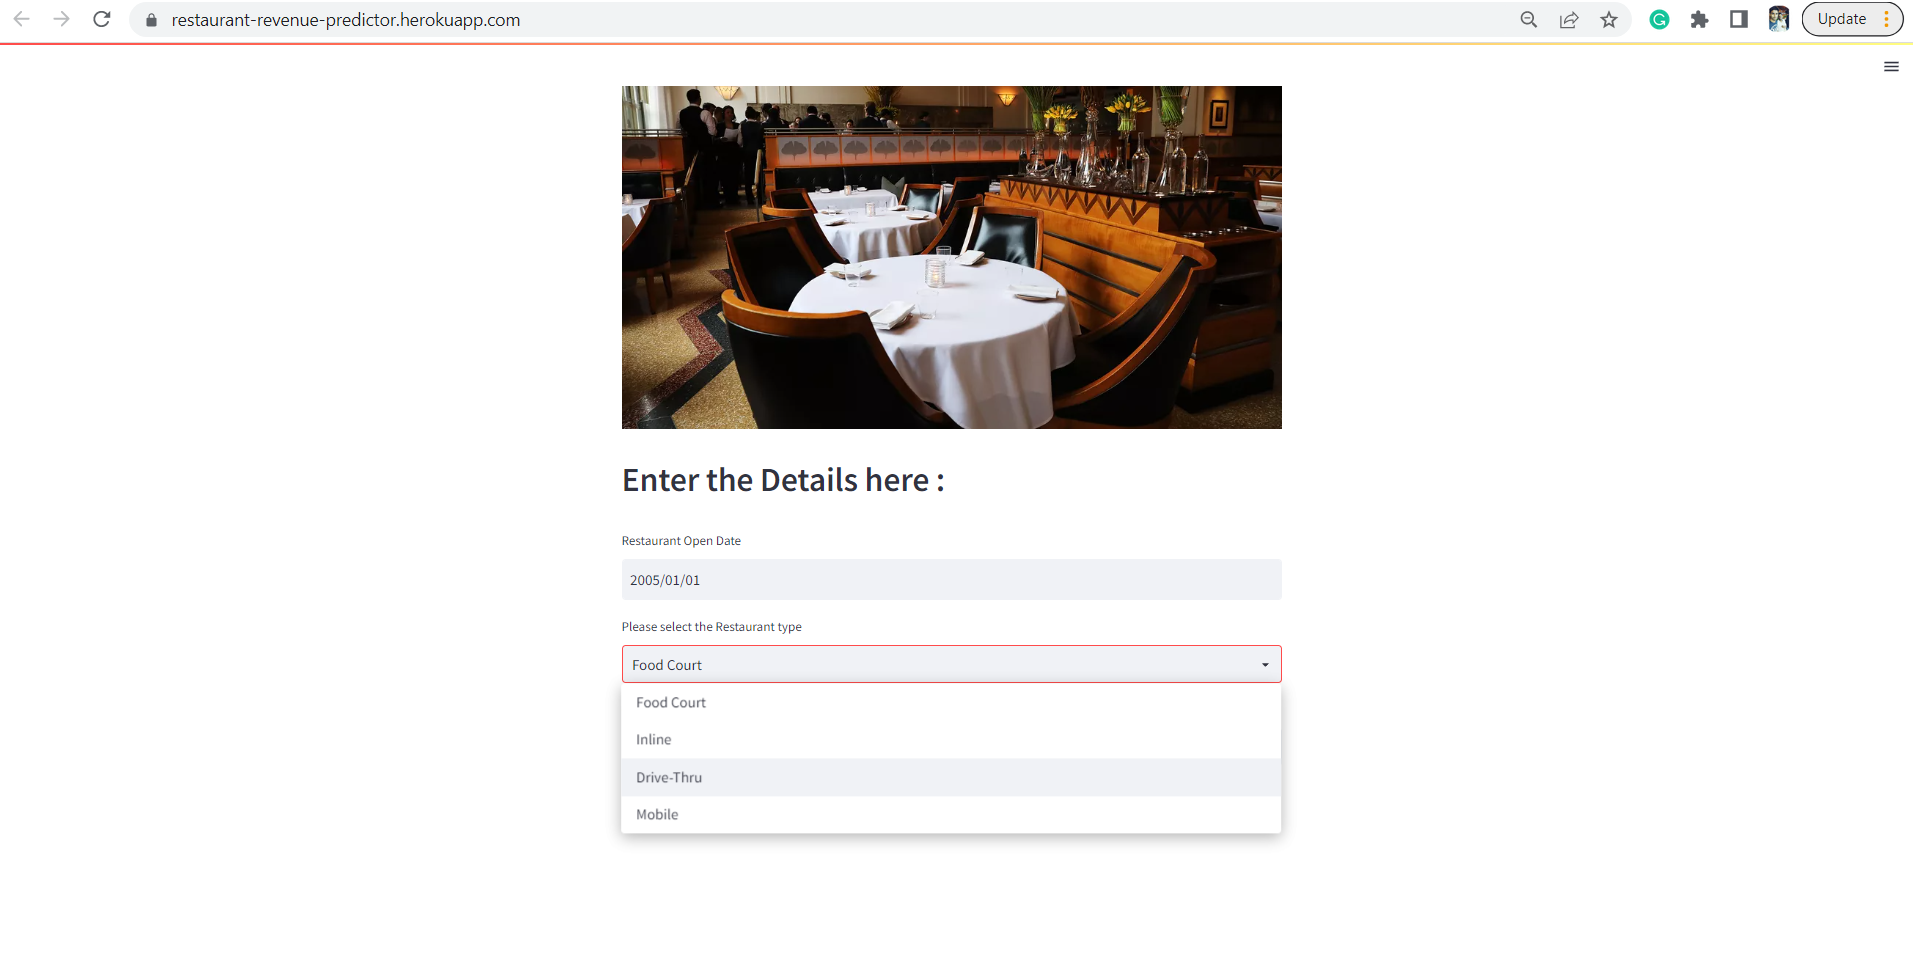

##### Selecting the City

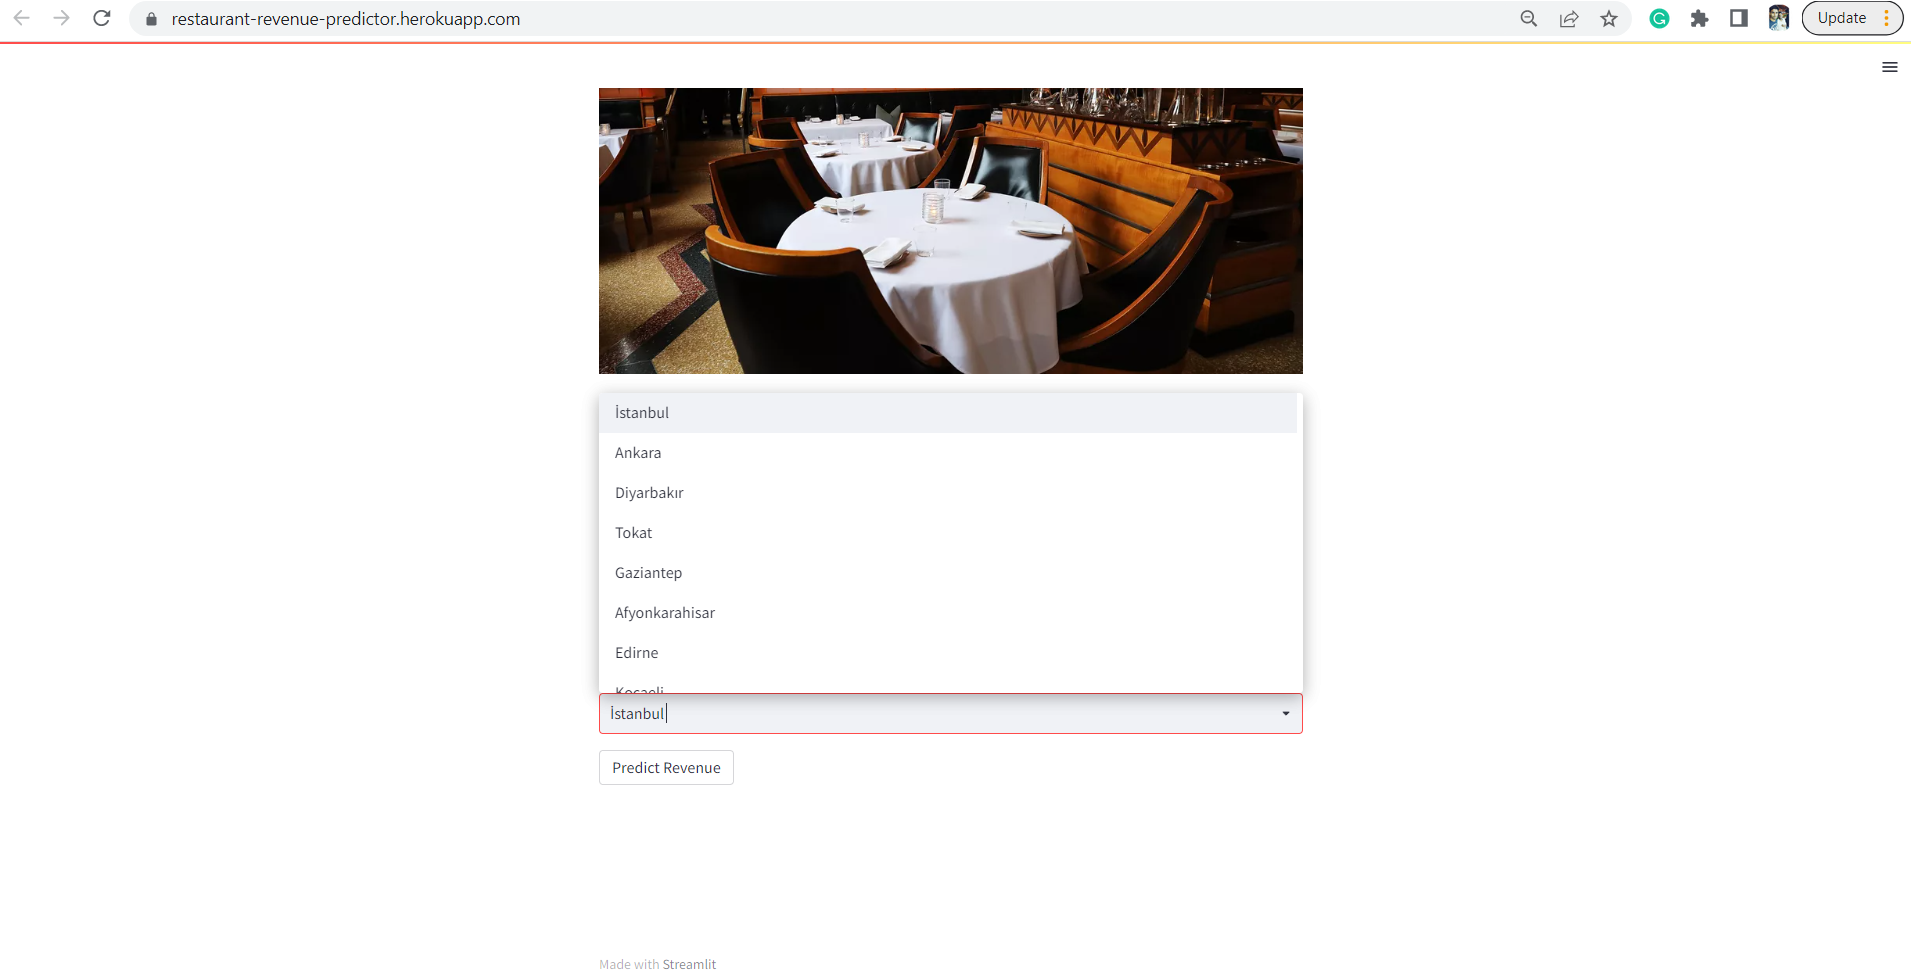

##### Predicting and displaying the Revenue

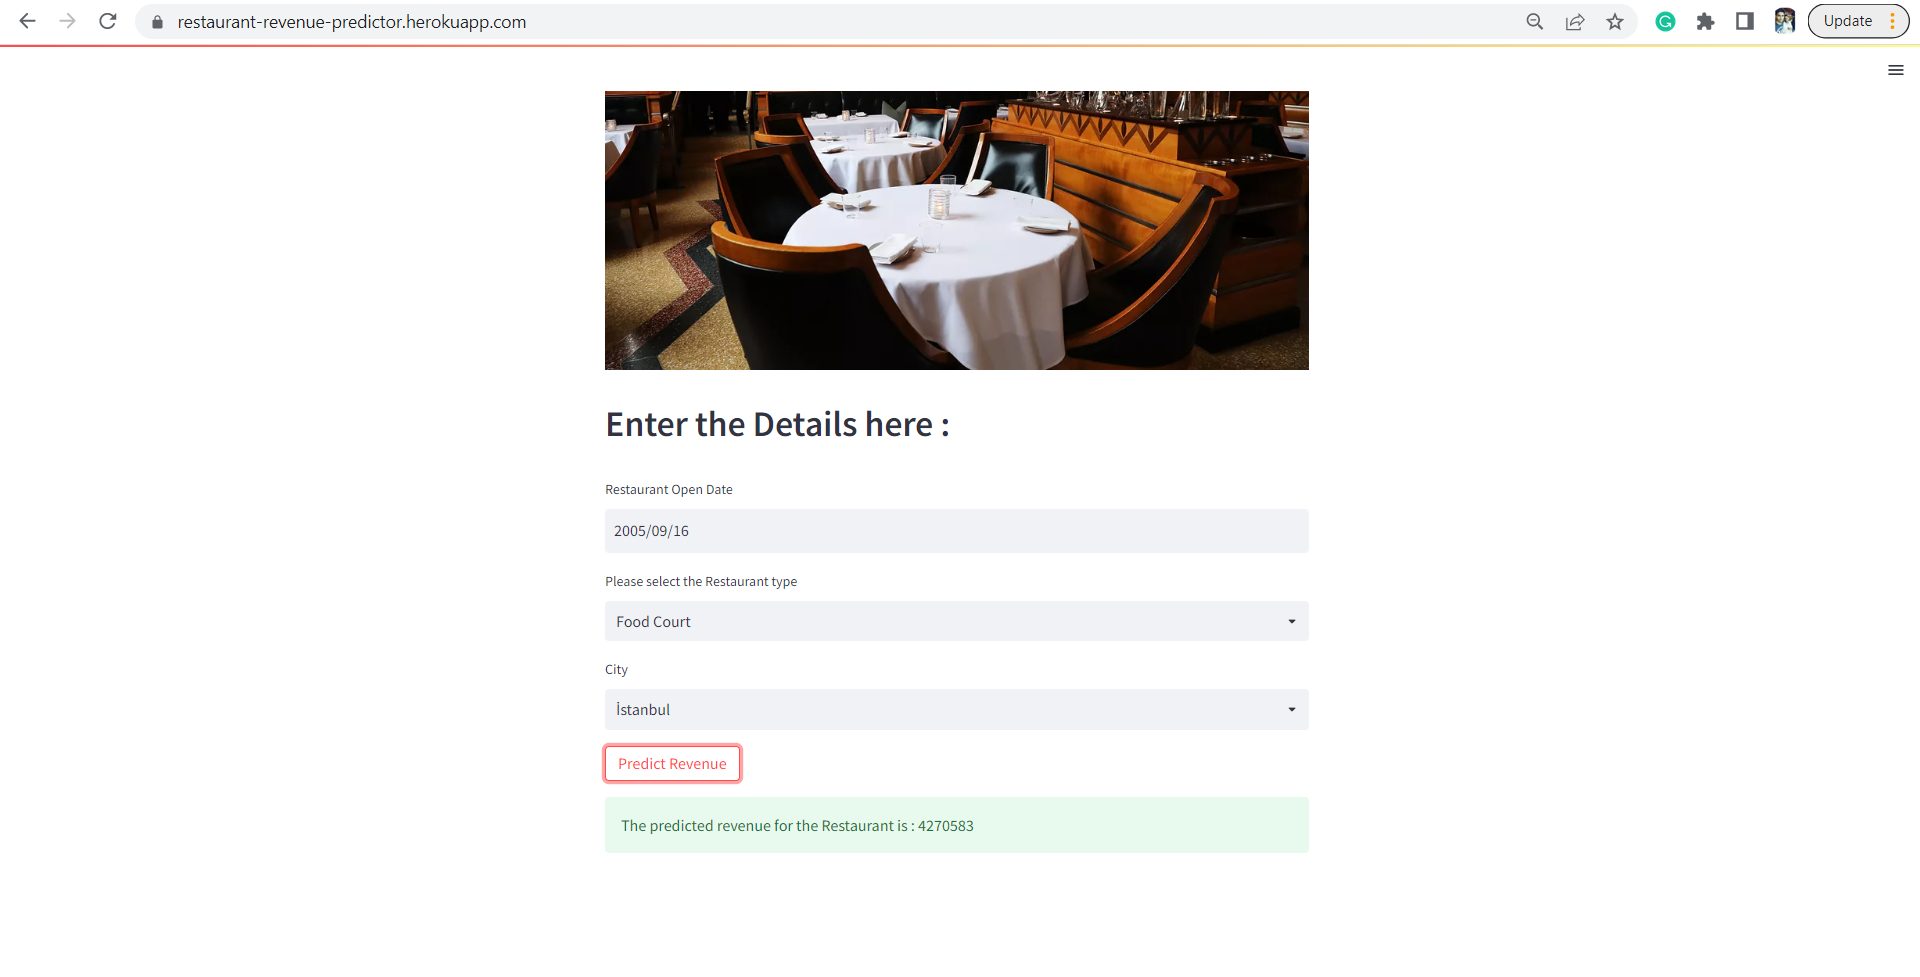

Here, we could see the output/Predicted Revenue when clicked on 'Predict Revenue' button after providing all the required inputs.